In [2]:
#import all libraries required in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data using pandas

df = pd.read_csv('HumanResources.csv', delimiter = ';')
df.head()

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
0,00-95822412,Danielle,Johnson,Female,New York,New York City,High School,13/02/1980,16/04/2016,05/07/2021,Customer Service,Help Desk Technician,81552,Needs Improvement
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,Bachelor,22/09/1987,09/02/2017,14/06/2019,IT,System Administrator,107520,Good
2,00-83197857,Erica,Mcclain,Male,New York,New York City,Bachelor,19/05/1994,03/02/2016,06/03/2021,Operations,Logistics Coordinator,61104,Good
3,00-13999315,Brittany,Johnson,Male,New York,New York City,Bachelor,18/04/1980,06/02/2016,06/11/2018,Operations,Inventory Specialist,73770,Good
4,00-90801586,Jeffery,Wagner,Female,New York,New York City,Bachelor,07/04/1985,11/01/2015,NaN,Operations,Operations Analyst,55581,Satisfactory


## Exploring statistical summary of Employee Salary:

To get an idea about salary distribution, let's dive into descriptive statistics for the salary column.

In [3]:
df.describe()

,Salary
count,8950.000000
mean,70964.213520
std,13763.126237
min,51835.000000
25%,60920.500000
50%,66592.500000
75%,78600.500000
max,149377.000000


- Avg Salary of employees is approx. $70,964

- Around 25% of employees earn more than $78k. This indicates a potential group og highly paid employees in the company.

## Check for any duplicates in the data set.

In [13]:
df['Employee_ID'].duplicated().sum()

np.int64(0)

### Cleaned and interpreted term_date nulls by marking active employees, preserving key workforce insights.


Calculating the total number of missing values in each column and handling them.

In [4]:
df.isnull().sum()  

Employee_ID              0
First Name               0
Last Name                0
Gender                   0
State                    0
City                     0
Education Level          0
Birthdate                0
Hiredate                 0
Termdate              7984
Department               0
Job Title                0
Salary                   0
Performance Rating       0
dtype: int64

The output confirms that only the `Termdate` column has missing values, with a total of **7984** null entries. As a terminated employee would have a termination date, a null value here logically indicates that the employee is still active.

In [5]:
df['Termdate'] = df['Termdate'].fillna('Active')
df.sample(10)

,Employee_ID,First Name,Last Name,Gender,State,City,Education Level,Birthdate,Hiredate,Termdate,Department,Job Title,Salary,Performance Rating
47,00-26879290,Chelsea,Hernandez,Female,Pennsylvania,Philadelphia,Master,19/10/1982,23/10/2016,05/06/2019,Sales,Sales Consultant,71142,Good
2182,00-96853189,Donald,Lee,Female,New York,Rochester,High School,18/07/1989,07/10/2021,Active,Customer Service,Help Desk Technician,70332,Satisfactory
4124,00-79590395,Angela,Clark,Female,New York,New York City,High School,30/01/1976,11/03/2017,Active,Customer Service,Support Specialist,63787,Needs Improvement
5501,00-74205049,Matthew,Martin,Female,Michigan,Detroit,Bachelor,09/06/1999,03/07/2022,Active,IT,Software Developer,80349,Satisfactory
4434,00-25692917,Robert,Fields,Male,New York,Rochester,High School,04/09/1969,29/08/2018,Active,IT,IT Support Specialist,59551,Satisfactory
533,00-26664623,Steven,Campbell,Male,New York,New York City,Master,21/03/1989,28/05/2020,24/11/2020,Sales,Sales Consultant,79231,Excellent
1494,00-99482259,Kenneth,Walters,Female,New York,New York City,Bachelor,20/05/1971,26/04/2017,Active,Operations,Logistics Coordinator,65195,Excellent
5620,00-55045402,Sarah,Collins,Female,Ohio,Cleveland,Bachelor,17/10/1990,06/12/2020,Active,Operations,Logistics Coordinator,57202,Excellent
8565,00-90490408,Jonathan,Jordan,Male,New York,Rochester,PhD,12/05/1974,03/01/2021,Active,Sales,Sales Specialist,76590,Satisfactory
6261,00-82636467,David,Campbell,Male,Michigan,Detroit,High School,11/12/1972,10/09/2017,Active,Customer Service,Support Specialist,66939,Excellent


### Checking for Missing values in the dataset.

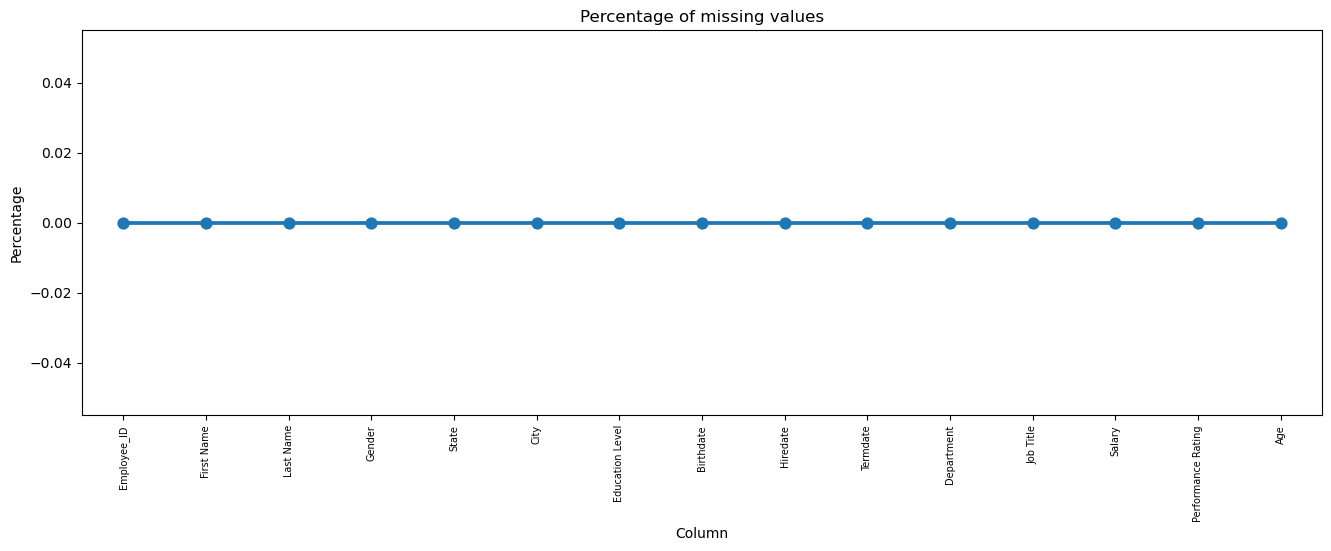

In [16]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.columns = ['Column', 'Missing Percent']
plt.figure(figsize = (16,5))
sns.pointplot(x = 'Column', y = 'Missing Percent', data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of missing values')
plt.ylabel('Percentage')
plt.show()

## Initial Intuition: 
There are no missing values in the data set.

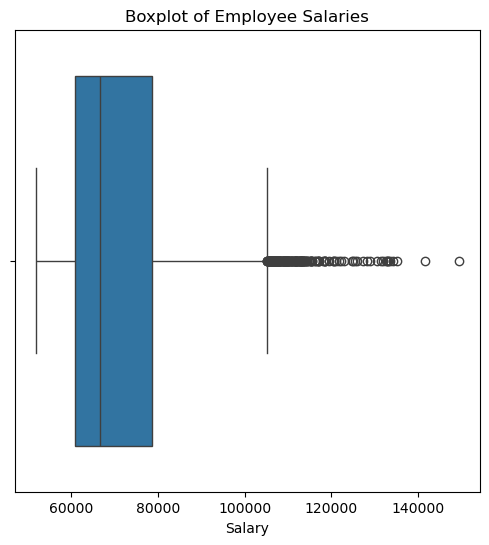

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = df['Salary'])
plt.title("Boxplot of Employee Salaries")
plt.xlabel("Salary")
plt.show()

## Initial Insights from Salary Outlier Analysis

* The majority of employee salaries lie between 60,000$-80,000$ as shown by the interquartile range (IQR).

* The median salary is around $66,000–67,000, which matches our earlier descriptive statistics.

* A significant number of employees earn above $100,000, which appear as outliers on the boxplot.

* These outliers may represent senior-level positions, executives, or niche high-paying roles within the company.

* Since salaries in real-world HR datasets naturally vary by job role and hierarchy, these outliers are valid data points and not errors and thus, they should be retained for analysis instead of removed.

## Employee Distribution By Department 

The Bar Chart shows the distribution of employees in each department of the Company

From the chart, we can see a clear imbalance in the workforce distribution. The **Operations** and **Sales** departments are the largest, with a significantly higher number of employees than departments like **HR** and **Finance Department**, which have the smallest teams.

Text(0, 0.5, 'Count of Employees')

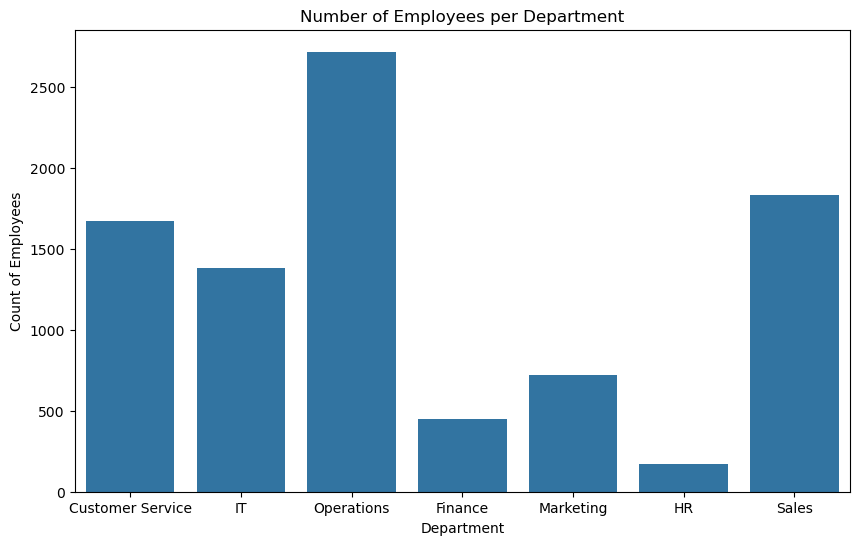

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Department', data = df)
plt.title("Number of Employees per Department")
plt.xlabel("Department")
plt.ylabel("Count of Employees")

### Average Salary of Males are Higher compared to Females

To investigate potential pay differences, we've compared the average salary between male and female employees. The bar chart shows the average salaries for each gender.


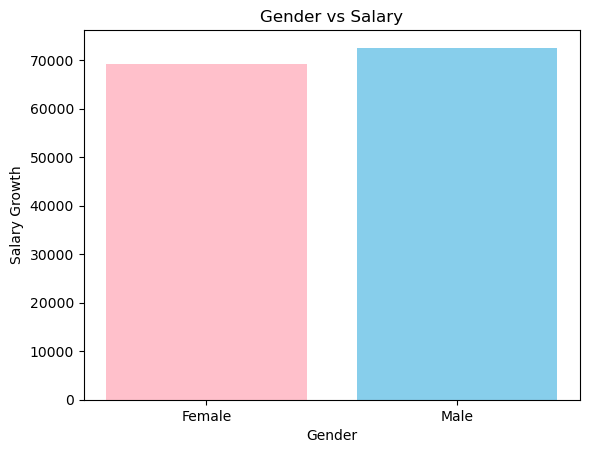

In [5]:
gender_salary = df.groupby("Gender")["Salary"].mean()
plt.bar(gender_salary.index, gender_salary.values, color=['Pink', 'skyblue'])
plt.xlabel('Gender')
plt.ylabel('Salary Growth')
plt.title('Gender vs Salary')
plt.show()

### Higher Education drives Higher Compensation.

The bar chart helps compare and analyze the impact of Education level on employees' average Salary

Text(0.5, 1.0, 'Education Vs Salary')

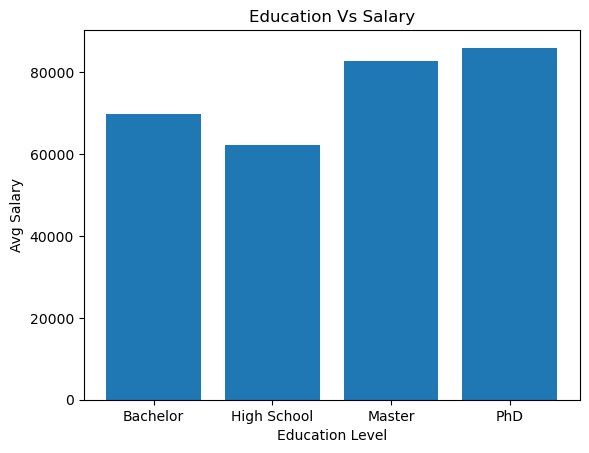

In [22]:
education_salary = df.groupby('Education Level')['Salary'].mean()
plt.bar(education_salary.index, education_salary.values)
plt.xlabel('Education Level')
plt.ylabel('Avg Salary')
plt.title('Education Vs Salary')

Processing birthdate data to compute each employee's age for analysis



In [6]:
from datetime import datetime
df['Birthdate'] = pd.to_datetime(df['Birthdate'], dayfirst = True)

# Define today's date 
today = pd.to_datetime("today")

# Calculating age
df['Age'] = (today - df['Birthdate']).dt.days // 365

### Correlation between Age and Average Salary

<Axes: xlabel='Age'>

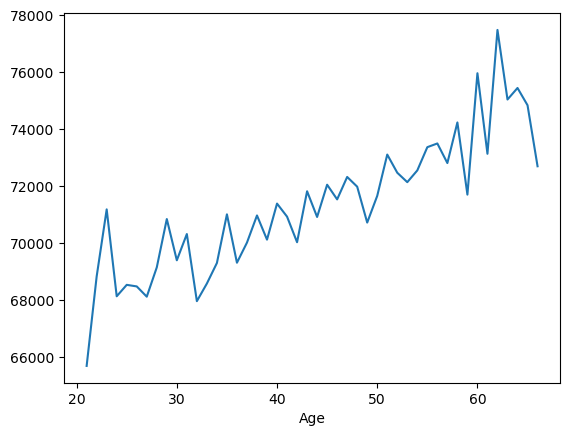

In [7]:
df.groupby('Age')['Salary'].mean().plot(kind='line')

##### The analysis indicates a positive correlation between employee age and average salary, suggesting that earnings tend to rise with experience and age.

<Axes: xlabel='Gender', ylabel='Salary'>

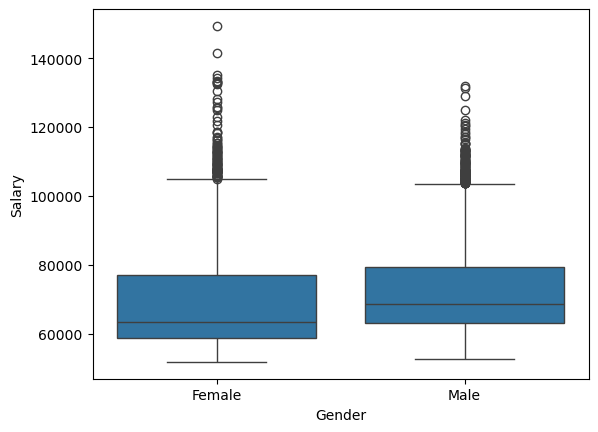

In [11]:
import seaborn as sns
sns.boxplot(x="Gender", y="Salary", data=df)

The box plot below compares the salary distribution between male and female employees.

While the average salary for males is slightly higher due to a few high-earning outliers, the **median salary for females is slightly higher** than that of males. This suggests that the typical female employee earns as much as, or even more than, the typical male employee, despite the average being skewed by top male earners.

## Data Cleaning:
- Drop invalid columns like 'Employee_ID', 'First Name', 'Last Name', 'City' that are not needed for analysis.

In [8]:
df_cleaned = df.drop(columns = ['Employee_ID', 'First Name', 'Last Name', 'City'])

# Training The Algorithm


Encoding all the categorical columns (like 'Gender', 'Education Level', and 'Department') into numerical values for training the algorithm.

In [9]:
df_encoded = pd.get_dummies(df, drop_first = True)

# Goal Of the Project

Now that we've cleaned and prepared our data, we'll build a linear regression model. 

Our goal is to see **how well different factors like age, education, and job title can help us predict a salary**.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Defining X (input features) and y (target variable) to train the model.

In [25]:
# Select relevant columns
X = df[['Age', 'Education Level', 'Department', 'Job Title', 'Performance Rating']]
y = df['Salary']

# One-hot encode categorical column (Education Level)
X = pd.get_dummies(X, columns=['Education Level', 'Department', 'Job Title', 'Performance Rating'], drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluation of Model's Performance

In [28]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 67100257.986360975
R² Score: 0.645902351897818


After training the model, we can test its accuracy with some key metrics. Here are the results:

**Mean Squared Error (MSE):** A lower MSE value is better. Our MSE is **67,100,257.99**, which represents the average squared difference between our model's predictions and the actual salaries. This tells us that, on average, our predictions were off by about $8,191 (the square root of the MSE).

**R² Score:** The R² score tells us how much of the salary variance our model can explain. An R² of 1 is a perfect model. Our model achieved an R² score of **0.646**, which means it can explain approximately **64.6% of the salary variation** in our data. This is a good result and shows that our chosen features are strong predictors of salary.

### Understanding what factors influence the Salary

In [29]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                            Coefficient
Age                                          124.215735
Education Level_High School                -2976.157915
Education Level_Master                     -1942.291419
Education Level_PhD                         2140.158284
Department_Finance                          -612.420549
Department_HR                              -4178.700628
Department_IT                              11811.157998
Department_Marketing                         664.189150
Department_Operations                         81.611707
Department_Sales                            6643.623055
Job Title_Accounts Payable Specialist     -11268.904248
Job Title_Content Creator                 -12868.993991
Job Title_Customer Service Manager          9976.383137
Job Title_Customer Service Representative -11891.868531
Job Title_Finance Manager                  54508.996813
Job Title_Financial Analyst                11488.914546
Job Title_HR Assistant                     -8114

### Final Insights

The coefficients above tell us the impact of each feature on an employee's salary. A positive value means the feature increases salary, while a negative value means it decreases it.

**Age:** For every year an employee gets older, their salary is expected to increase by approximately $124.

**Education Level:** Compared to someone with a Bachelor's degree (our baseline), having a PhD increases the salary by about 2,140, while having only a High School education decreases it by about $2,976.

**Job Title and Department:** We can see that certain jobs have a big impact. For example, being an **IT Manager** or a **Finance Manager** has a very large positive effect on salary.

**Performance Rating**: Interestingly, the ratings don't have a huge effect on salary in our model. This could be because other factors like job title and department are more important, or it might mean that performance ratings are not a strong predictor of salary in this dataset.